In [97]:
#goal to improve simulator!
    #create a path rather than a origin only
    #what is energy and what do I use it for?
    #what do i use time for?
    #gaussian distribution of the errors
    #histogram of the errors
    #principle of occam's razor
    #Do morethan a point source
    #create a line!
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np
import math
import matplotlib.mlab as mlab


In [98]:
#find all values greater than a certain value
def findGreater(mat,val):
    arr = np.array([])
    for i in range(mat.shape[0]): #xaxis
        for j in range(mat.shape[1]): #yaxix
            if(mat[i,j] > val):
                arr = np.append(arr,mat[i,j])
                
    return arr

In [99]:
def pointSlopeForm(angle,x,y):
    #find the eqn of the line: 
    slope = math.atan(3.14)
    print(slope)
    #y = mx + b
    intercept = y - (slope * x)
    #ax + by + c =0 == y - mx - b = 0
    a = -slope
    b = 1
    c = intercept
    return a,b,c

In [100]:
def minDistToLine(a,b,c,point_x,point_y):
    #distance = |ax0 + by0 + c| / sqrt(a^2 + b^2)
    top = abs(a*(point_x) + b*(point_y) + c)
    bottom = math.sqrt(pow(a,2)+pow(b,2))
    return top/bottom

In [101]:
"""Def Generate neutrino 
Random origin (x,y)
Random direction (dx, dy) or (one angles)
Random energy (0 to 1) or (10 to 300 nanoseconds)
Random time
(make code adjustable)
We want to know how fast the neutrino is"""
def generateNeutrino():
    x = random.uniform(0,10)
    y = random.uniform(0,10)
    angle = random.vonmisesvariate(0, 0)
    energy = random.random();
    time = random.randint(10,300)

    return x, y, angle, energy, time

In [141]:
def generateSignal(x,y,angle,energy,time):
    nodes = 10
    x_arr = np.linspace(0,nodes,nodes + 1)
    y_arr = np.linspace(0,nodes,nodes + 1)
    #10 by 10 grid which is the VICE CUBE
    
    #using MeshGrid
    mesh_x, mesh_y = np.meshgrid(x_arr, y_arr)
    
    a,b,c = pointSlopeForm(angle,x,y)
    #to find the distance from the point to a line I used the line to distance forumula
    distance = minDistToLine(a,b,c,mesh_x,mesh_y)
    
    #energy
    mu = energy
    variance = energy * 0.5
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 121)
    energyDist = mlab.normpdf(x, mu, sigma)
    energyDist = np.reshape(energyDist,(11,11))
    plt.plot(energyDist)
    plt.show()
    
    #find charge
    #charge formula: C = (maxDistance - distance_to_each_node)^2 / maxDistance
    maxDistance = math.sqrt((nodes * nodes) + (nodes * nodes))
    charge = np.power((maxDistance - distance),2) / pow(maxDistance,2)
    #charge = charge * energyDist
    
    #based on the angle and the origin create a line (data fit) that would simulate a neutrino path
    return mesh_x, mesh_y, distance, charge

In [142]:
def createTrainingVector(dataSize):

    xy = np.zeros(2)
    trainVec = np.zeros((dataSize,121),dtype = np.float32)
    trainLabel = np.zeros((dataSize,2), dtype = np.float32)

    for i in range(dataSize):
        x_o,y_o,angle,energy,time = generateNeutrino();
        mesh_x, mesh_y, distance, charge = generateSignal(x_o,y_o,angle,energy,time)
        xy[0] = x_o
        xy[1] = y_o
        #flattening the charge matrix to a vector
        chargeVector = charge.flatten()
        trainVec[i,:] = chargeVector
        trainLabel[i,:] = xy
    
    return trainVec, trainLabel

In [143]:
def exampleRun():
    x,y,angle,energy,time = generateNeutrino();
    mesh_x, mesh_y, distance, charge = generateSignal(x,y,angle,energy,time)

    
    plt.plot(mesh_x,mesh_y, marker='.', color='k', linestyle='none')
    plt.title("viCE Cube Simulator")
    plt.savefig("simulator.png")

    plt.show()
    plt.plot(mesh_x,mesh_y, marker='.', color='k', linestyle='none')

    plt.title("viCE Cube Simulator Run")

    CS = plt.contourf(mesh_x, mesh_y,charge, 15, cmap=plt.cm.rainbow,
                  vmax=charge.max(), vmin=0)
    plt.colorbar()  
    plt.savefig("simulator_charge.png")
    plt.show()

    print("x y angle energy time")
    print(x,y,angle,energy,time)
    
    #print("distance\n", distance)
    print("charge\n", charge)

1.2624806645994682


/Users/mohammfa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


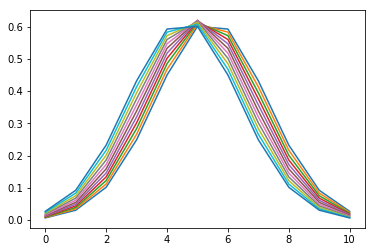

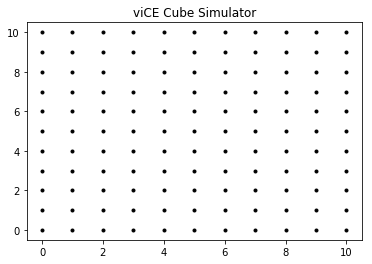

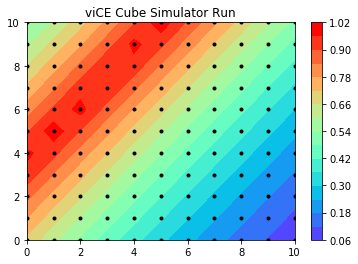

x y angle energy time
5.949119666238751 3.821241245317818 1.4922616790890288 0.8283480040950982 180
charge
 [[0.70227304 0.61244456 0.52876082 0.45122182 0.37982755 0.31457803
  0.25547324 0.20251318 0.15569787 0.11502729 0.08050146]
 [0.77778663 0.68309096 0.59454002 0.51213383 0.43587237 0.36575565
  0.30178366 0.24395642 0.19227391 0.14673614 0.10734311]
 [0.85715548 0.75759262 0.66417449 0.5769011  0.49577244 0.42078853
  0.35194935 0.28925491 0.23270521 0.18230025 0.13804002]
 [0.9403796  0.83594954 0.73766421 0.64552363 0.55952778 0.47967667
  0.4059703  0.33840867 0.27699177 0.22171961 0.1725922 ]
 [0.97291294 0.91816172 0.8150092  0.71800142 0.62713838 0.54242008
  0.46384651 0.39141769 0.3251336  0.26499425 0.21099963]
 [0.88822839 0.99577976 0.89620945 0.79433448 0.69860424 0.60901875
  0.52557799 0.44828197 0.37713068 0.31212414 0.25326233]
 [0.80739911 0.91008329 0.98126496 0.87452279 0.77392537 0.67947268
  0.59116472 0.50900151 0.43298303 0.36310929 0.29938029]
 [0.730425

In [144]:
exampleRun()

In [90]:
def inputFunction(dataSize):
    trainVec, trainLabel = createTrainingVector(dataSize)    
    features = {'x' : trainVec}
    #trainLabel is the output. which currently is the origin
    labels = trainLabel
    #labels = np.int(labels)
    
    
    return features, labels


In [43]:
#returns MSE
def evaluateModel(DNNRegressor, inputFn):
    #evaluating accuracy
    evalReg = DNNRegressor.evaluate(input_fn = inputFn)
    print("\n\nTest Accuracy=",evalReg)

    # The evaluation returns a Python dictionary. The "average_loss" key holds the
    # Mean Squared Error (MSE).    
    return evalReg["average_loss"]

In [44]:
#function returns predictions
def predict(DNNRegressor, predictFeatures,predictLabels):
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
            x=predictFeatures,
            num_epochs=1,
            shuffle=False)
    
    predictions = list(DNNRegressor.predict(input_fn=predict_input_fn))
    predicted_classes = [p["predictions"] for p in predictions]
    predicted_classes = np.array(predicted_classes)

    print("Predictions\n", predicted_classes)
    
    print("Labels\n", predictLabels)
    
    #converting to Tensor, not necessary but was going to use it for a function that required tensors.
    """
    lab = tf.convert_to_tensor(
        new_samples_labels,
        dtype=None,
        name=None,
        preferred_dtype=None)
    #

    pred = tf.convert_to_tensor(
        predicted_classes,
        dtype=None,
        name=None,
        preferred_dtype=None)
    print(type(lab))
    print(type(lab.dtype))
    print(type(pred))
    print(type(pred.dtype))
    """
    return predicted_classes

In [45]:
trainSize = 450
testSize = 4000

trainFeatures, trainLabels = inputFunction(trainSize)
testFeatures, testLabels = inputFunction(testSize)

print((trainFeatures['x'].dtype))
print(trainLabels.dtype)
print(trainFeatures['x'].shape)
print(trainLabels.shape)

#train input fn
train_input_fn = tf.estimator.inputs.numpy_input_fn(x=(trainFeatures),
                                                    y=(trainLabels),
                                                    num_epochs=None,
                                                    shuffle=True)
#train input fn
train_input_fn_test = tf.estimator.inputs.numpy_input_fn(x=(trainFeatures),
                                                    y=(trainLabels),
                                                    num_epochs=1,
                                                    shuffle=False)


#test input fn
test_input_fn = tf.estimator.inputs.numpy_input_fn(x=(testFeatures),
                                                   y=(testLabels),
                                                   num_epochs=1,
                                                   shuffle=False)
#defining feature columns
my_feature_columns = []
print("feature_columns=",my_feature_columns)

# Specify that all features have real-value data
my_feature_columns = [tf.feature_column.numeric_column("x", shape=[121])]


# Build 3 layer DNN Regressor with 10, 20, 10 units respectively. With 2D labels (x,y)
regressor = tf.estimator.DNNRegressor(feature_columns=my_feature_columns,
                                      label_dimension = 2,
                                      hidden_units= [10,20,10], model_dir="/tmp/cube_model")

float32
float32
(450, 121)
(450, 2)
feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/cube_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb2c3dc2e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
#Training regressor
regressor.train(input_fn=train_input_fn, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cube_model/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4001 into /tmp/cube_model/model.ckpt.
INFO:tensorflow:loss = 8574.085, step = 4001
INFO:tensorflow:global_step/sec: 599.703
INFO:tensorflow:loss = 1662.7942, step = 4101 (0.167 sec)
INFO:tensorflow:global_step/sec: 874.861
INFO:tensorflow:loss = 1706.0283, step = 4201 (0.115 sec)
INFO:tensorflow:global_step/sec: 908.966
INFO:tensorflow:loss = 1465.9963, step = 4301 (0.110 sec)
INFO:tensorflow:global_step/sec: 888.424
INFO:tensorflow:loss = 1487.7339, step = 4401 (0.113 sec)
INFO:tensorflow:global_step/sec: 888.328
INFO:tensorflow:loss = 1526.0671, step = 4501 (0.112 sec)
INFO:tensorflow:global_step/sec: 868.929
INFO:tensorflow:loss = 1387.226

In [47]:
#Evalutating regressor
train_accuracy = evaluateModel(regressor, train_input_fn_test)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:12:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cube_model/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:12:45
INFO:tensorflow:Saving dict for global step 6000: average_loss = 4.7979026, global_step = 6000, loss = 1079.5281


Test Accuracy= {'average_loss': 4.7979026, 'loss': 1079.5281, 'global_step': 6000}


In [48]:
#Evalutating regressor
accuracy = evaluateModel(regressor, test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:12:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cube_model/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:12:47
INFO:tensorflow:Saving dict for global step 6000: average_loss = 4.8209033, global_step = 6000, loss = 1205.2258


Test Accuracy= {'average_loss': 4.8209033, 'loss': 1205.2258, 'global_step': 6000}


In [49]:
#predicting model
predictSize = 8
predictFeatures,predictLabels = inputFunction(predictSize)
predictions = predict(regressor, predictFeatures,predictLabels)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cube_model/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predictions
 [[5.7571816 3.9237518]
 [4.6660247 4.9774203]
 [6.4789667 3.5825396]
 [5.975449  3.2799237]
 [5.4904275 3.6250741]
 [2.2530947 7.16452  ]
 [2.5884452 7.252357 ]
 [5.264269  4.1699142]]
Labels
 [[6.6955957 4.998465 ]
 [2.3830245 2.177048 ]
 [6.6927314 3.91113  ]
 [2.926431  0.845707 ]
 [5.4045353 5.0924354]
 [3.1501951 8.53858  ]
 [1.3947186 5.6797504]
 [8.098223  8.467747 ]]
